In [1]:
!pip install spafe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 4.3 MB/s eta 0:00:00


In [2]:
import librosa
import numpy as np
import scipy.fftpack as fft
import matplotlib.pyplot as plt
import spafe 

# Load the .wav file
filename = '/kaggle/input/justdo/s1.wav'
y, sr = librosa.load(filename)
print(sr)

# Compute MFCC
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc = 200)

22050


/tmp/ipykernel_19/1809835682.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, sig = scipy.io.wavfile.read(filename)


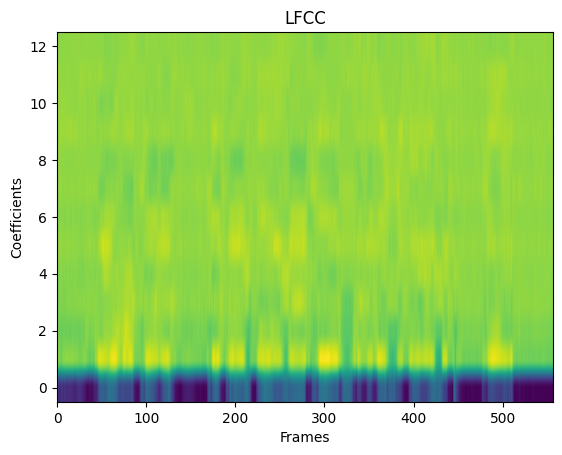

In [3]:
import scipy.io.wavfile
import spafe.utils.vis as vis
from spafe.features.lfcc import lfcc

# read wave file
fs, sig = scipy.io.wavfile.read(filename)

# compute lfccs
lfccs = lfcc(sig, num_ceps=13)

# visualize features
import matplotlib.pyplot as plt

# Assuming lfccs is your computed LFCCs
plt.imshow(lfccs.T, origin='lower', aspect='auto')
plt.title('LFCC')
plt.ylabel('Coefficients')
plt.xlabel('Frames')
plt.show()


In [4]:
# import librosa
# import matplotlib.pyplot as plt

# # Load your audio file
# filename = '/kaggle/input/justdo/room_impulse_response.wav'
# y, sr = librosa.load(filename)

# # Plot the waveform
# plt.figure(figsize=(14, 5))
# plt.plot(np.arange(len(y))/sr, y)  # x values represent time in seconds
# plt.xlim([0, 0.2])  # Zoom into the first 0.5 seconds
# plt.title('Waveform (0 to 0.5 seconds)')
# plt.ylabel('Amplitude')
# plt.xlabel('Time (seconds)')
# plt.show()


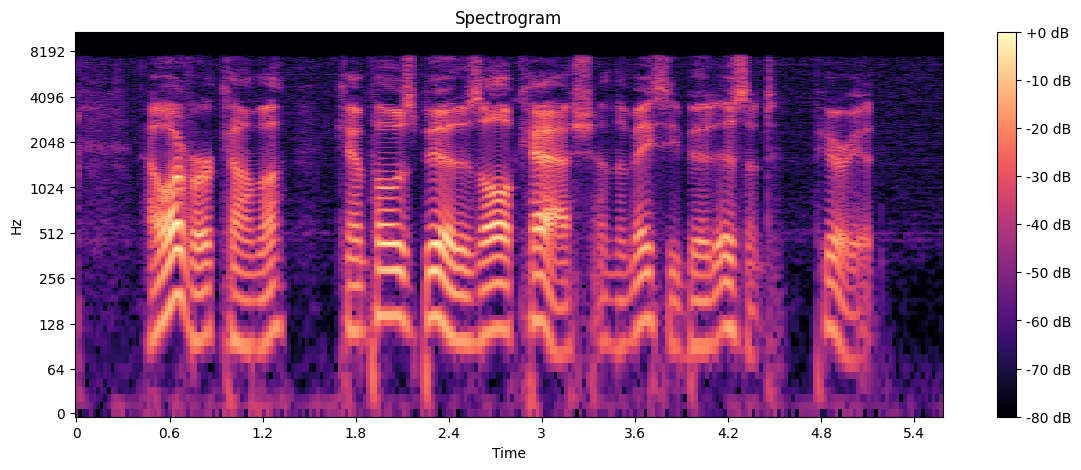

In [5]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Compute the STFT of the signal
D = librosa.stft(y)

# Convert the STFT into magnitude and phase
magnitude, phase = librosa.magphase(D)

# Convert magnitude to dB scale
magnitude_db = librosa.amplitude_to_db(magnitude, ref=np.max)

# Display the STFT magnitude in dB scale
plt.figure(figsize=(14, 5))
librosa.display.specshow(magnitude_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [6]:
n_bins = 100

# Compute CQT
cqt = librosa.cqt(y, sr=sr, n_bins=n_bins)

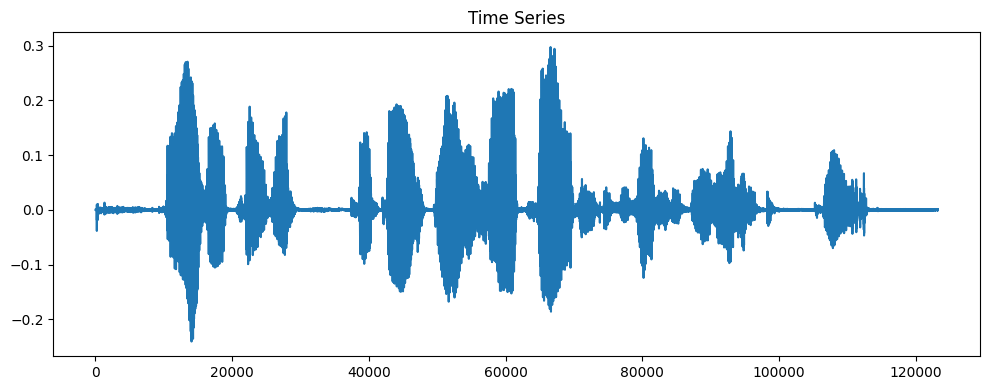

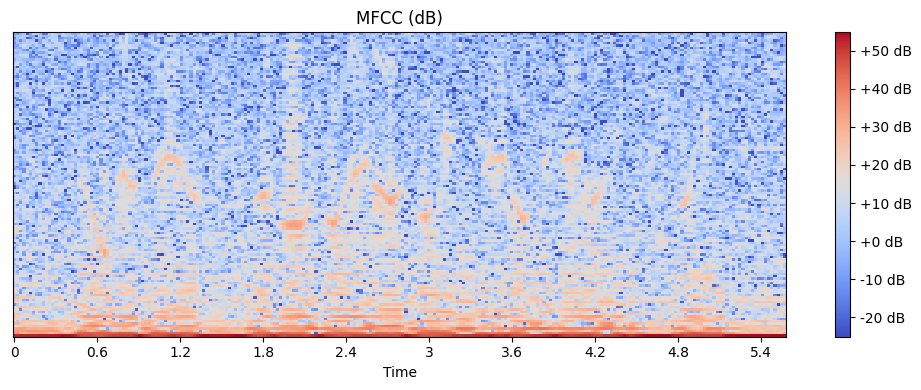

/tmp/ipykernel_19/3132191195.py:25: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(cqt, ref=np.max), sr=sr, x_axis='time', y_axis='cqt_note')


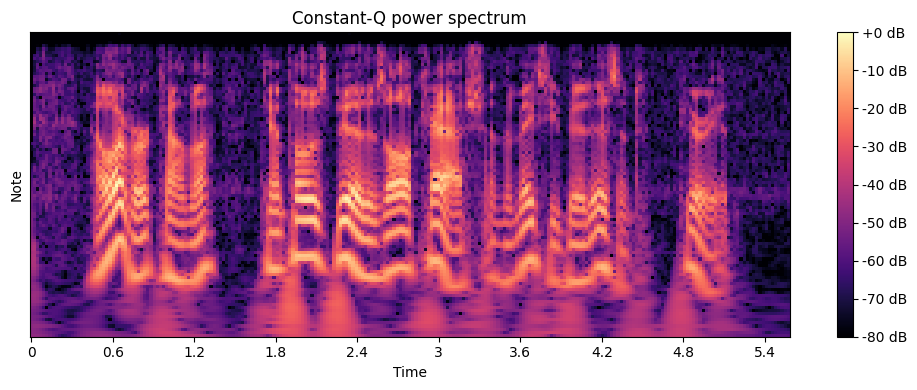

In [7]:
# Plot time series
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.title('Time Series')
plt.tight_layout()
plt.show()
# Plot MFCC in dB
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(mfcc), x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC (dB)')
plt.tight_layout()
plt.show()

# # Plot LFCC in dB
# plt.figure(figsize=(10, 4))
# librosa.display.specshow(librosa.amplitude_to_db(lfccs), x_axis='time')
# plt.colorbar(format='%+2.0f dB')
# plt.title('LFCC (dB)')
# plt.tight_layout()
# plt.show()

# Plot CQT
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(cqt, ref=np.max), sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')
plt.tight_layout()
plt.show()


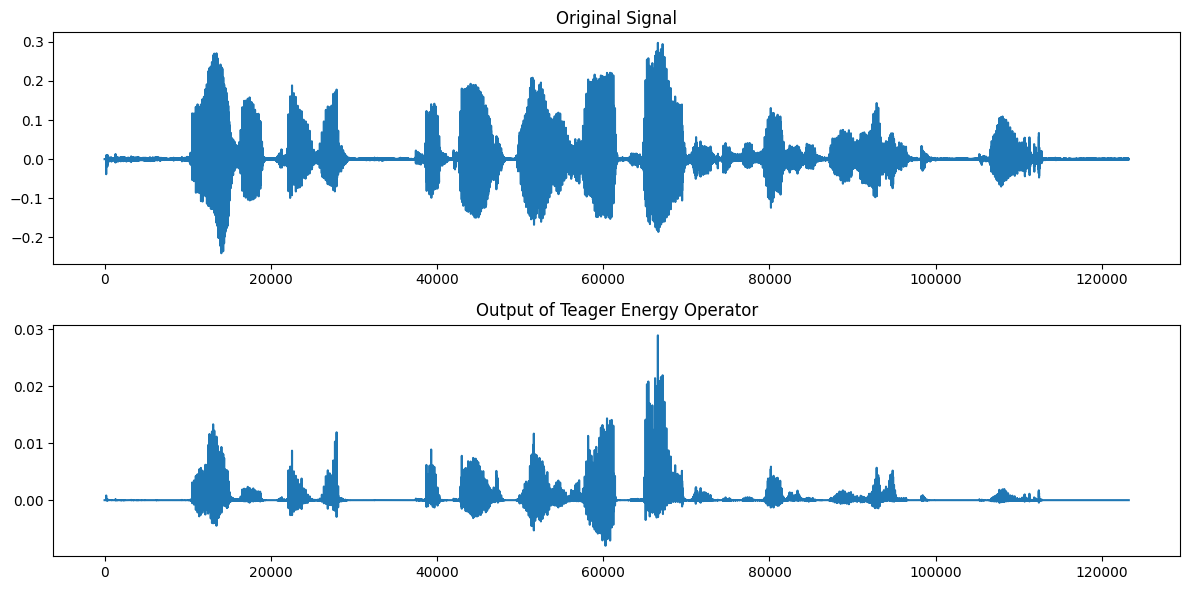

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def teager_energy_operator(x):
    # Ensure x is a numpy array
    x = np.array(x)

    # Initialize the output signal
    teo_x = np.zeros_like(x)

    # Compute the TEO for each sample in the signal
    for n in range(1, len(x) - 1):
        teo_x[n] = x[n]**2 - x[n - 1]*x[n + 1]

    return teo_x

# Apply the TEO
teo_x = teager_energy_operator(y)

# Plot the original signal and the TEO output
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(y)
plt.title('Original Signal')
plt.subplot(2, 1, 2)
plt.plot(teo_x)
plt.title('Output of Teager Energy Operator')
plt.tight_layout()
plt.show()


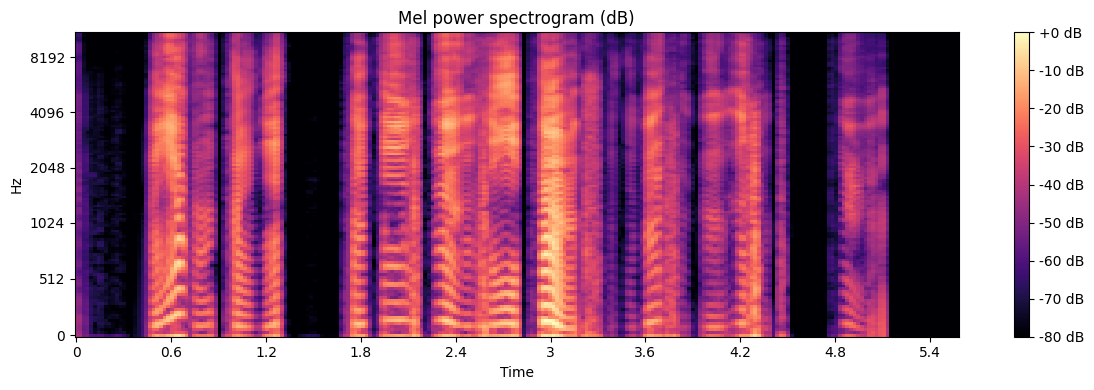

In [9]:
import librosa
import librosa.display

# Compute the Mel spectrogram of the TEO output
S = librosa.feature.melspectrogram(y=teo_x, sr=sr, n_mels=128, fmax=8000)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a Mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('Mel power spectrogram (dB)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()
plt.show()


shape of an MFCC output for each file, and it's a 2D matrix format with MFCC bands on the y-axis and time on the x-axis, representing the MFCC bands over time. To simplify things, what we're going to do is take the mean across each band over time.   

Source : Audio Emotion Recognition
Part 2 - Feature Extraction
21st August 2019
Eu Jin Lok

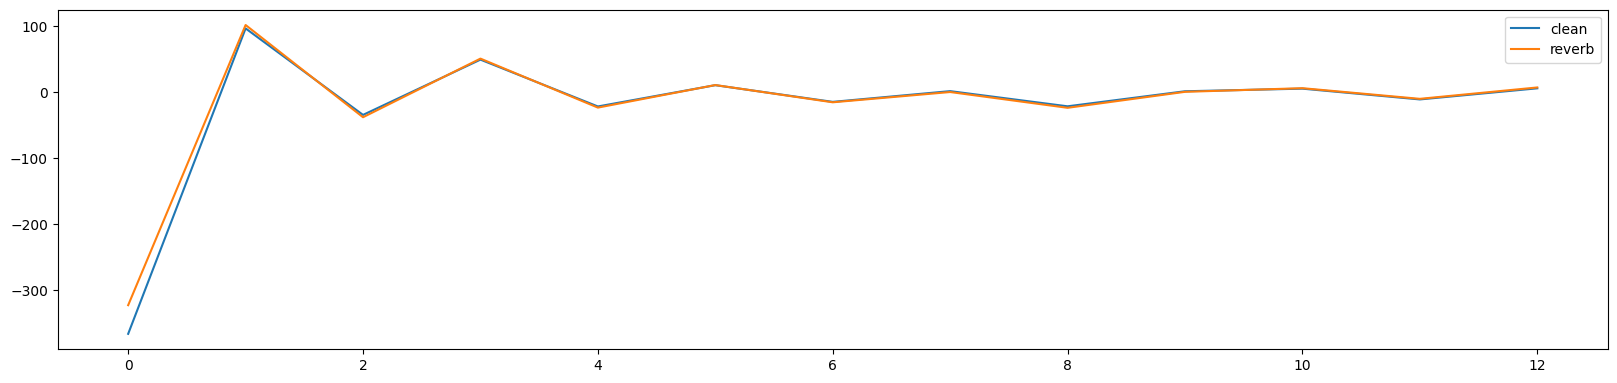

In [10]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Load your audio file
path = "/kaggle/input/justdo/s1.wav"
X, sample_rate = librosa.load(path)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# Source - RAVDESS; Gender - Male; Emotion - Angry 
path = "/kaggle/input/justdo/s1_reverb.wav"
X, sample_rate = librosa.load(path)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(np.mean(female, axis=1), label='clean')
plt.plot(np.mean(male, axis=1), label='reverb')
plt.legend()
plt.show()
